In [39]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
# from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow_datasets as tfds
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras import backend as K
from keras import layers
from tensorflow.keras import Sequential
from matplotlib import pyplot

In [40]:
# # Construct a tf.data.Dataset
# ds = tfds.load('kmnist', split='train', shuffle_files=True)

# print(type(ds))

# # Build your input pipeline
# ds = ds.shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)

In [41]:
# for example in ds.take(1):
#     images, labels = example["image"], example["label"]
    
#     plt.figure(figsize=(10,10),facecolor="lightgreen")
#     for i in range(32): # 25 images
#         plt.subplot(8,8,i+1) # matrix of 5 X 5 array
#         plt.xticks([])
#         plt.yticks([])
#         plt.grid(False)
#         plt.imshow(images[i])
#     plt.show()
    

In [42]:
# model = Sequential([
#     layers.Conv2D(32, (2,2), activation="relu", input_shape=(32,32, 1)),
#     layers.Flatten(), # 2d to 1d
#     layers.Dense(16, activation="relu"),
#     layers.Dense(10)
# ])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# print(model.summary())

In [43]:
# baseline_history = model.fit(ds, epochs=20)
# baseline_history

## RNN VS LSTM model for IMDB Dataset

In [2]:
from numpy import mean
from numpy import std
from keras.datasets import imdb
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
# from keras.preprocessing import sequence
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import SGD


In [45]:
vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

print('---review---')
print(X_train[6])
print('---label---')
print(y_train[6])

word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])

Loaded dataset with 25000 training samples, 25000 test samples
---review---
[1, 2, 365, 1234, 5, 1156, 354, 11, 14, 2, 2, 7, 1016, 2, 2, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 2, 2, 1117, 1831, 2, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 2, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 2, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 2, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]
---label---
1
---review with words---
['the', 'and', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'and', 'and', 'br', 'villain', 'and', 'and', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'and', 'concept', 'issue', 'and', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 

In [46]:
from keras.utils import pad_sequences
max_words = 500
X_train = pad_sequences(X_train, maxlen=max_words)
X_test = pad_sequences(X_test, maxlen=max_words)

In [47]:

embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
batch_size = 64

X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
hist = model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=10)

Epoch 1/10
390/390 [==============================] - 17s 37ms/step - loss: 0.4852 - accuracy: 0.7573 - val_loss: 0.3594 - val_accuracy: 0.8750
Epoch 2/10
390/390 [==============================] - 13s 34ms/step - loss: 0.2971 - accuracy: 0.8810 - val_loss: 0.2940 - val_accuracy: 0.9062
Epoch 3/10
390/390 [==============================] - 13s 33ms/step - loss: 0.2462 - accuracy: 0.9044 - val_loss: 0.2655 - val_accuracy: 0.9219
Epoch 4/10
390/390 [==============================] - 13s 34ms/step - loss: 0.2228 - accuracy: 0.9149 - val_loss: 0.2354 - val_accuracy: 0.9375
Epoch 5/10
390/390 [==============================] - 13s 34ms/step - loss: 0.1915 - accuracy: 0.9274 - val_loss: 0.2367 - val_accuracy: 0.9062
Epoch 6/10
390/390 [==============================] - 14s 36ms/step - loss: 0.1695 - accuracy: 0.9373 - val_loss: 0.2142 - val_accuracy: 0.9062
Epoch 7/10
390/390 [==============================] - 14s 36ms/step - loss: 0.1541 - accuracy: 0.9419 - val_loss: 0.2554 - val_accuracy:

In [ ]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(hist,'accuracy','val_accuracy')
show_train_history(hist,'loss','val_loss')   

In [49]:
model.evaluate(X_test, y_test, verbose=1)

782/782 [==============================] - 11s 13ms/step - loss: 0.4349 - accuracy: 0.8420


[0.43486008048057556, 0.8420000076293945]

In [50]:
embedding_vector_length = 32
num_words = 2000
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_vector_length, input_length=max_words))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           64000     
                                                                 
 dropout_2 (Dropout)         (None, 500, 32)           0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_24 (Dense)            (None, 256)               8448      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                 257       
                                                                 
Total params: 81,025
Trainable params: 81,025
Non-tra

In [51]:
train_history = model.fit(X_train, y_train, batch_size=32,
                          epochs=10, verbose=1,
                          validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 17s 24ms/step - loss: 0.4562 - accuracy: 0.7785 - val_loss: 0.3380 - val_accuracy: 0.8580
Epoch 2/10
625/625 [==============================] - 13s 22ms/step - loss: 0.3319 - accuracy: 0.8649 - val_loss: 0.3539 - val_accuracy: 0.8558
Epoch 3/10
625/625 [==============================] - 14s 22ms/step - loss: 0.2967 - accuracy: 0.8806 - val_loss: 0.3131 - val_accuracy: 0.8724
Epoch 4/10
625/625 [==============================] - 14s 22ms/step - loss: 0.2770 - accuracy: 0.8903 - val_loss: 0.3407 - val_accuracy: 0.8638
Epoch 5/10
625/625 [==============================] - 14s 22ms/step - loss: 0.2434 - accuracy: 0.9046 - val_loss: 0.3401 - val_accuracy: 0.8734
Epoch 6/10
625/625 [==============================] - 13s 21ms/step - loss: 0.2289 - accuracy: 0.9107 - val_loss: 0.3299 - val_accuracy: 0.8616
Epoch 7/10
625/625 [==============================] - 13s 21ms/step - loss: 0.2194 - accuracy: 0.9143 - val_loss: 0.3494 - val_accuracy:

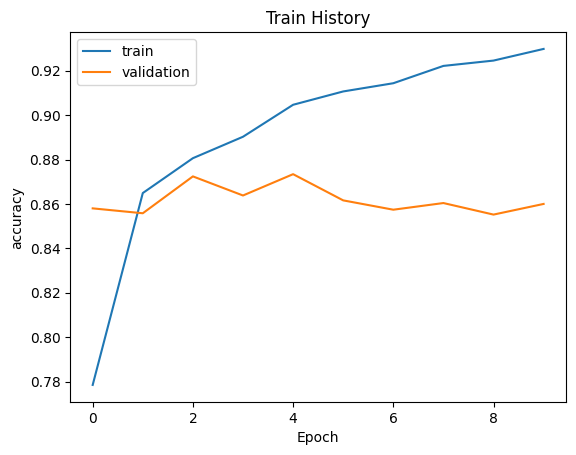

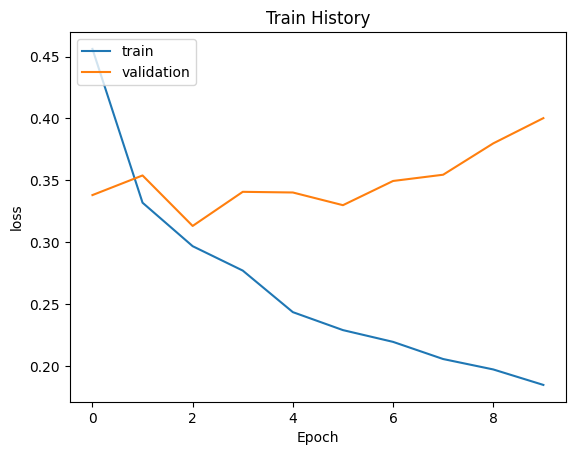

In [52]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')   

In [53]:
scores = model.evaluate(X_test, y_test, verbose=1)
scores[1]

782/782 [==============================] - 8s 10ms/step - loss: 0.3929 - accuracy: 0.8634


0.8634399771690369

In [54]:
# predict=model.predict_classes(X_test)
# predict_classes=predict.reshape(len(X_test))

# RNN VS LSTM VS GRU for tweet dataset from Kaggle

In [2]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, SimpleRNN, Activation, Dropout, Conv1D
from tensorflow.keras.layers import Embedding, Flatten, LSTM, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import spacy
from sklearn.metrics import classification_report
# https://haochen23.github.io/2020/01/nlp-rnn-sentiment.html#.Y3sIcXZByUk

In [23]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# data = pd.read_csv("https://raw.githubusercontent.com/haochen23/nlp-rnn-lstm-sentiment/master/training.1600000.processed.noemoticon.csv", header=None, encoding='cp437')
# print("The shape of the original dataset is {}".format(data.shape))
# data

raw = pd.read_csv('data/Reddit_Data.csv')
raw

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [24]:
raw['category'].value_counts()

 1    15830
 0    13142
-1     8277
Name: category, dtype: int64

In [32]:
NUM = 8277

positive = raw[raw['category']==1].sample(8277)
neutral = raw[raw['category']==0].sample(8277)
negative = raw[raw['category']==-1].sample(8277)

data = pd.concat([positive, neutral, negative], axis=0).sample(frac=1)
# positive.shape, neutral.shape, negative.shape

data

,clean_comment,category
16267,saying that even rahul gandhi has shot for po...,0
100,want move gujarat and live there for few mont...,-1
24592,just picked the gold edition looking forward p...,-1
27283,indian politician introduced the streisand eff...,0
25032,the country going shit but all not yet lost vo...,-1
...,...,...
214,olliieeee cool you like,1
21446,don bark people vote 2019,0
15775,bhai itna time kese aapke paas sapio saar,0
4402,krepo krepo krepo krepo,0


In [34]:
def load_glove_model(glove_file):
    print("[INFO]Loading GloVe Model...")
    model = {}
    with open(glove_file, 'r') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embeddings = [float(val) for val in split_line[1:]]
            model[word] = embeddings
    print("[INFO] Done...{} words loaded!".format(len(model)))
    return model
# adopted from utils.py
nlp = spacy.blank("en")

def remove_stopwords(sentence):
    '''
    function to remove stopwords
        input: sentence - string of sentence
    '''
    new = []
    # tokenize sentence
    sentence = nlp(sentence)
    for tk in sentence:
        if (tk.is_stop == False) & (tk.pos_ !="PUNCT"):
            new.append(tk.string.strip())
    # convert back to sentence string
    c = " ".join(str(x) for x in new)
    return c


def lemmatize(sentence):
    '''
    function to do lemmatization
        input: sentence - string of sentence
    '''
    sentence = nlp(sentence)
    s = ""
    for w in sentence:
        s +=" "+w.lemma_
    return nlp(s)

def sent_vectorizer(sent, model):
    '''
    sentence vectorizer using the pretrained glove model
    '''
    sent_vector = np.zeros(200)
    num_w = 0
    for w in sent.split():
        try:
            # add up all token vectors to a sent_vector
            sent_vector = np.add(sent_vector, model[str(w)])
            num_w += 1
        except:
            pass
    return sent_vector

In [54]:
data_X = data['clean_comment'].to_numpy().astype('str')
data_y = data['category']
data_y = pd.get_dummies(data_y).to_numpy()

data_X.shape, data_y.shape

((24831,), (24831, 3))

In [43]:
# load the glove model
glove_model = load_glove_model("glove.twitter.27B.200d.txt")
# number of vocab to keep
max_vocab = 18000
# length of sequence that will generate
max_len = 15

tokenizer = Tokenizer(num_words=max_vocab)

[INFO]Loading GloVe Model...
[INFO] Done...1193514 words loaded!


AttributeError: 'float' object has no attribute 'lower'

In [62]:
tokenizer.fit_on_texts(data_X)
sequences = tokenizer.texts_to_sequences(data_X)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data_keras = pad_sequences(sequences, maxlen=max_len, padding="post")

data_keras.shape

Found 43491 unique tokens.


(24831, 15)

In [64]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(data_keras, data_y, test_size = 0.3, random_state=42)

train_X.shape, valid_X.shape, train_y.shape, valid_y.shape

((17381, 15), (7450, 15), (17381, 3), (7450, 3))

In [79]:
# calculate number of words
nb_words = len(tokenizer.word_index) + 1
print(nb_words)

# obtain the word embedding matrix
embedding_matrix = np.zeros((nb_words, 200))

for word, i in word_index.items():
    embedding_vector = glove_model.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

43492
Null word embeddings: 12499


In [102]:
# adopted from sent_tran_eval.py
def build_model(nb_words, rnn_model="SimpleRNN", embedding_matrix=None):
    '''
    build_model function:
    inputs: 
        rnn_model - which type of RNN layer to use, choose in (SimpleRNN, LSTM, GRU)
        embedding_matrix - whether to use pretrained embeddings or not
    '''
    model = Sequential()
    # add an embedding layer
    if embedding_matrix is not None:
        model.add(Embedding(nb_words, 
                        200, 
                        weights=[embedding_matrix], 
                        input_length= max_len,
                        trainable = False))
    else:
        model.add(Embedding(nb_words, 
                        200, 
                        input_length= max_len,
                        trainable = False))
        
    # add an RNN layer according to rnn_model
    if rnn_model == "SimpleRNN":
        model.add(SimpleRNN(256))
    elif rnn_model == "LSTM":
        model.add(LSTM(256))
    else:
        model.add(GRU(256))
        
    model.add(Dense(512,activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])
    return model

In [103]:
model_rnn = build_model(nb_words, "SimpleRNN", embedding_matrix)
model_rnn.fit(train_X, train_y, epochs=10, batch_size=120,
          validation_data=(valid_X, valid_y))
# predictions = model_rnn.predict(valid_X)
# predictions = predictions.argmax(axis=1)
# print(classification_report(valid_y.argmax(axis=1), predictions))
#, callbacks=EarlyStopping(monitor='val_accuracy', mode='max',patience=3)

Epoch 1/10
145/145 [==============================] - 3s 18ms/step - loss: 0.8794 - accuracy: 0.5721 - val_loss: 0.8044 - val_accuracy: 0.6322
Epoch 2/10
145/145 [==============================] - 2s 16ms/step - loss: 0.7523 - accuracy: 0.6635 - val_loss: 0.7854 - val_accuracy: 0.6366
Epoch 3/10
145/145 [==============================] - 2s 17ms/step - loss: 0.6825 - accuracy: 0.7045 - val_loss: 0.8166 - val_accuracy: 0.6388
Epoch 4/10
145/145 [==============================] - 2s 17ms/step - loss: 0.6193 - accuracy: 0.7388 - val_loss: 0.8681 - val_accuracy: 0.6369
Epoch 5/10
145/145 [==============================] - 2s 17ms/step - loss: 0.5297 - accuracy: 0.7834 - val_loss: 0.9090 - val_accuracy: 0.6258
Epoch 6/10
145/145 [==============================] - 2s 17ms/step - loss: 0.4397 - accuracy: 0.8268 - val_loss: 1.0055 - val_accuracy: 0.6193
Epoch 7/10
145/145 [==============================] - 2s 17ms/step - loss: 0.3678 - accuracy: 0.8566 - val_loss: 1.0731 - val_accuracy: 0.6226

In [104]:
model_rnn.evaluate(valid_X, valid_y)

233/233 [==============================] - 1s 4ms/step - loss: 1.3274 - accuracy: 0.6224


[1.3273695707321167, 0.622416079044342]

In [105]:
model_lstm = build_model(nb_words, "LSTM", embedding_matrix)
model_lstm.fit(train_X, train_y, epochs=10, batch_size=120,
          validation_data=(valid_X, valid_y))
# predictions = model_lstm.predict(valid_X)
# predictions = predictions.argmax(axis=1)
# print(classification_report(valid_y.argmax(axis=1), predictions))
#, callbacks=EarlyStopping(monitor='val_accuracy', mode='max',patience=3)

Epoch 1/10
145/145 [==============================] - 9s 49ms/step - loss: 0.8142 - accuracy: 0.6232 - val_loss: 0.7532 - val_accuracy: 0.6619
Epoch 2/10
145/145 [==============================] - 7s 49ms/step - loss: 0.6949 - accuracy: 0.6918 - val_loss: 0.7172 - val_accuracy: 0.6917
Epoch 3/10
145/145 [==============================] - 9s 62ms/step - loss: 0.6235 - accuracy: 0.7284 - val_loss: 0.6598 - val_accuracy: 0.7137
Epoch 4/10
145/145 [==============================] - 11s 74ms/step - loss: 0.5529 - accuracy: 0.7638 - val_loss: 0.6416 - val_accuracy: 0.7293
Epoch 5/10
145/145 [==============================] - 12s 80ms/step - loss: 0.4828 - accuracy: 0.7997 - val_loss: 0.6381 - val_accuracy: 0.7400
Epoch 6/10
145/145 [==============================] - 11s 78ms/step - loss: 0.4045 - accuracy: 0.8337 - val_loss: 0.6799 - val_accuracy: 0.7264
Epoch 7/10
145/145 [==============================] - 11s 74ms/step - loss: 0.3232 - accuracy: 0.8699 - val_loss: 0.7811 - val_accuracy: 0.

In [106]:
model_lstm.evaluate(valid_X, valid_y)

233/233 [==============================] - 3s 13ms/step - loss: 1.0694 - accuracy: 0.7419


[1.0694185495376587, 0.7418791651725769]

In [107]:
model_gru = build_model(nb_words, "GRU", embedding_matrix)
model_gru.fit(train_X, train_y, epochs=10, batch_size=120,
          validation_data=(valid_X, valid_y))
# predictions = model_gru.predict(valid_X)
# predictions = predictions.argmax(axis=1)
# print(classification_report(valid_y.argmax(axis=1), predictions))
#, callbacks=EarlyStopping(monitor='val_accuracy', mode='max',patience=3)

Epoch 1/10
145/145 [==============================] - 39s 47ms/step - loss: 0.8497 - accuracy: 0.5967 - val_loss: 0.7410 - val_accuracy: 0.6647
Epoch 2/10
145/145 [==============================] - 9s 60ms/step - loss: 0.6612 - accuracy: 0.7071 - val_loss: 0.6529 - val_accuracy: 0.7192
Epoch 3/10
145/145 [==============================] - 7s 50ms/step - loss: 0.5763 - accuracy: 0.7569 - val_loss: 0.6153 - val_accuracy: 0.7356
Epoch 4/10
145/145 [==============================] - 8s 56ms/step - loss: 0.5055 - accuracy: 0.7898 - val_loss: 0.6248 - val_accuracy: 0.7470
Epoch 5/10
145/145 [==============================] - 8s 53ms/step - loss: 0.4346 - accuracy: 0.8212 - val_loss: 0.6553 - val_accuracy: 0.7466
Epoch 6/10
145/145 [==============================] - 8s 52ms/step - loss: 0.3631 - accuracy: 0.8553 - val_loss: 0.6706 - val_accuracy: 0.7569
Epoch 7/10
145/145 [==============================] - 8s 54ms/step - loss: 0.2791 - accuracy: 0.8922 - val_loss: 0.7329 - val_accuracy: 0.750

In [108]:
model_gru.evaluate(valid_X, valid_y)

233/233 [==============================] - 2s 10ms/step - loss: 1.2313 - accuracy: 0.7475


[1.2313312292099, 0.7475167512893677]